----
## **<font color="crimson"> Ya están ok base de datos viento, falta diseño (pondré vectores? tarda mucho v) </font>**

In [1]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### **<font color="Purple"> Datos de ERA5 </font>**

##### **<font color="olive"> Viento </font>**

In [8]:
fileu_era5 = 'datasetsok/u_daily_500_200_1979-2024.nc'
# filev_era5 = 'datasetsok/v_wind_1979-2024_MSRG.nc'

In [9]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']
# v_ds = xr.open_dataset(filev_era5)
# v_era5 = v_ds['v']

In [10]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(pressure_level=200)
# v200E5 = v_era5.sel(pressure_level=200)

In [11]:
# v200E5 = v200E5.sel(latitude=slice(40,10),longitude=slice(-133,-63))
u200E5 = u200E5.sel(latitude=slice(40,10),longitude=slice(227,297))

In [12]:
u200E5_anual=u200E5.mean(dim='time') 
# v200E5_anual=v200E5.mean(dim='time') 

In [13]:
u200E5_DJF = u200E5.groupby(u200E5.time.dt.season).mean(dim='time')[0]
# v200E5_DJF = v200E5.groupby(v200E5.time.dt.season).mean(dim='time')[0]

##### **<font color="olive"> Temperatura </font>**

In [14]:
filet2m_era5 = 'datasetsok/t2mC_1979-2024large.nc' #ya está en Celsius

In [15]:
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']

In [16]:
# Calcular promedio estacional
t2m_anual = t2m.mean(dim='time')
t2m_DJF=t2m.groupby(t2m.time.dt.season).mean(dim='time')[0]

### **<font color="Purple"> Datos de HadGEM3 </font>**

##### **<font color="olive"> Viento </font>**

In [17]:
fileu_hg = 'datasetsok/uday_250hpa_HG_1979_2014.nc'
# filev_hg = 'datasetsok/vday_250hpa_HG_1979_2014.nc'

In [18]:
# Abrir archivos y seleccionar variables a usar 
u_ds_hg=xr.open_dataset(fileu_hg)
ua_hg=u_ds_hg['ua']  

# v_ds_hg=xr.open_dataset(filev_hg )
# va_hg=v_ds_hg['va']

In [19]:
u200HG = ua_hg.sel(lat=slice(10, 40), lon=slice(227,297))
# v200HG = va_hg.sel(lat=slice(10, 40), lon=slice(232,294)) 
#para que tengan las mismas latitudes y longitudes

In [20]:
u200HG_anual = ua_hg.mean(dim='time')
# v200HG_anual = va_hg.mean(dim='time')

In [21]:
u200HG_DJF=u200HG.groupby(u200HG.time.dt.season).mean(dim='time')[0]

In [22]:
# v200HG_DJF=v200HG.groupby(v200HG.time.dt.season).mean(dim='time')[0]

##### **<font color="olive"> Temperatura </font>**

In [23]:
tas_file = 'datasetsok/tasday79.nc' #ya está en Celsius

In [24]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']

In [25]:
tas_anual = tas.mean(dim='time')

In [26]:
# Promedio de temperatura por estación 
tas_DJF = tas.groupby(tas.time.dt.season).mean(dim='time')[0] 

----
## **<font color="crimson"> HadGEM3 vs ERA5, temperatura y viento (anual y DJF) </font>**

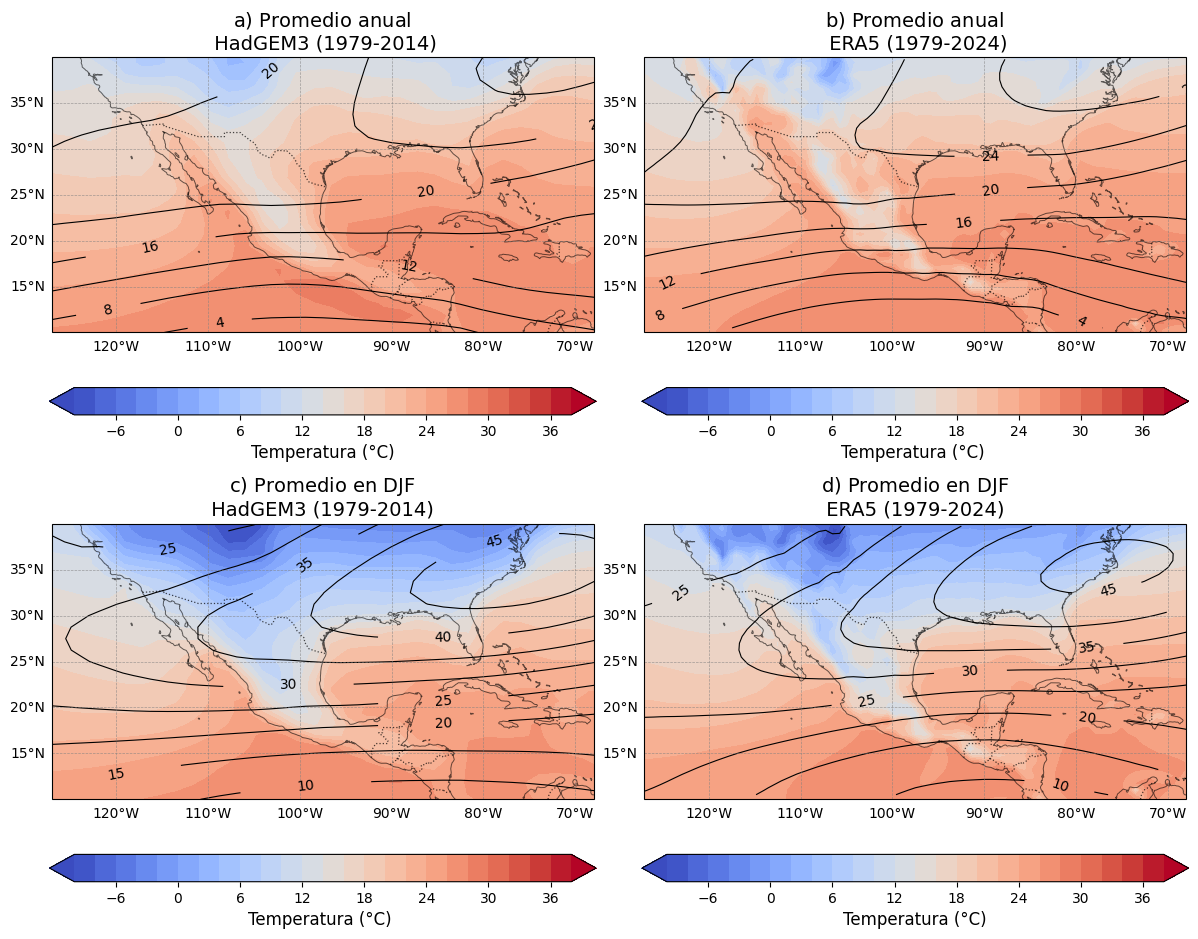

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
axs = axs.flatten()
plt.subplots_adjust(wspace=0.1,hspace=0.7)

# Subplot 1 ANUAL JOYA
ax1 = axs[0]
ax1.coastlines(linewidth=0.7,alpha=0.6)
cs = ax1.contourf(tas_anual.lon, tas_anual.lat, tas_anual, levels=np.arange(-10, 40,2), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
cc=ax1.contour(u200HG_anual.lon, u200HG_anual.lat, u200HG_anual,levels=np.arange(0,50,4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10,inline_spacing=0.0001)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = fig.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=12)
ax1.set_title('a$)$ Promedio anual \n HadGEM3 (1979-2014)', fontsize=14)

# Subplot 2 ANUAL ERA5
ax2 = axs[1]
ax2.coastlines(linewidth=0.7,alpha=0.6)
cs = ax2.contourf(t2m_anual.longitude, t2m_anual.latitude, t2m_anual, levels=np.arange(-10, 40, 2),cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
cc=ax2.contour(u200E5_anual.longitude,u200E5_anual.latitude,u200E5_anual,levels=np.arange(0,50,4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = fig.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax2)
cbar.ax.set_xlabel('Temperatura (°C) ', fontsize=12)
ax2.set_title('b$)$ Promedio anual \n ERA5 (1979-2024)', fontsize=14)

# Subplot 3 DJF JOYA
ax3 = axs[2]
ax3.coastlines(linewidth=0.7,alpha=0.6)
cs = ax3.contourf(tas_DJF.lon, tas_DJF.lat, tas_DJF, levels=np.arange(-10, 40,2), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
cc=ax3.contour(u200HG_DJF.lon, u200HG_DJF.lat, u200HG_DJF,levels=np.arange(0,50,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax3.clabel(cc, cc.levels, fontsize=10,inline_spacing=0.0001)
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax3.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = fig.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax3)
cbar.ax.set_xlabel('Temperatura (°C) ', fontsize=12)
ax3.set_title('c$)$ Promedio en DJF \n HadGEM3 (1979-2014) ', fontsize=14)

# Subplot 4 DJF ERA 5
ax4 = axs[3]
ax4.coastlines(linewidth=0.7,alpha=0.6)
cs = ax4.contourf(t2m_DJF.longitude, t2m_DJF.latitude, t2m_DJF, levels=np.arange(-10, 40, 2), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
cc=ax4.contour(u200E5_DJF.longitude,u200E5_DJF.latitude,u200E5_DJF,levels=np.arange(0,50,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax4.clabel(cc, cc.levels, inline=True, fontsize=10)#,inline_spacing=5)
ax4.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax4.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
cbar = fig.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax4)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=12)
ax4.set_title('d$)$ Promedio en DJF \n ERA5 (1979-2024) ', fontsize=14)


# Título principal
plt.tight_layout()
plt.subplots_adjust(top=.89)
# plt.suptitle('Viento zonal diario a 200 hPa \ny temperatura superficial', fontsize=14, color="k", fontstyle='italic', fontweight='bold')
plt.savefig('figsok/2_Vzonal_t2m-tas.png')